# Just an example.You can alter sample code anywhere. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [4]:
#Fix the random seed
np.random.seed(0)

## Load the training data and label

In [5]:
train_load = np.loadtxt('./data/train.csv',delimiter=',',dtype="int")
test_data = np.loadtxt('./data/test.csv',delimiter=',',dtype="int")


In [9]:
train_data=train_load[:,1:]
train_label=train_load[:,0]

In [35]:
train_data_mnist=train_data.reshape(100000, 28,28)
print("shape of train_data: {}".format(train_data_mnist.shape))
print("shape of train_label: {}".format(train_label.shape))
print("shape of test_data: {}".format(test_data.shape))

shape of train_data: (100000, 28, 28)
shape of train_label: (100000,)
shape of test_data: (12800, 784)


## Show the training data

In [20]:

print("After shift")
shiftpoint=2
imageleft=np.zeros((28,28), dtype=int)
imageright=np.zeros((28,28), dtype=int)
imageup=np.zeros((28,28), dtype=int)
imagedown=np.zeros((28,28), dtype=int)
magedown=np.zeros((28,28), dtype=int)
mageupleft=np.zeros((28,28), dtype=int)
magedownleft=np.zeros((28,28), dtype=int)
mageupright=np.zeros((28,28), dtype=int)
magedownright=np.zeros((28,28), dtype=int)
train_data_aug1=np.zeros((100000, 784), dtype=int)
train_data_aug2=np.zeros((100000, 784), dtype=int)
train_data_aug3=np.zeros((100000, 784), dtype=int)
train_data_aug4=np.zeros((100000, 784), dtype=int)
train_data_aug5=np.zeros((100000, 784), dtype=int)
train_data_aug6=np.zeros((100000, 784), dtype=int)
train_data_aug7=np.zeros((100000, 784), dtype=int)
train_data_aug8=np.zeros((100000, 784), dtype=int)
for index in range(len(train_data)):
    image = train_data[index].reshape(28,28)

    for i in range(28-shiftpoint):
        imageleft[i]=image[i+shiftpoint]
        imageright[-i]=image[-i-shiftpoint]

    for i in range(28-shiftpoint):
        imageup[:,i]=image[:,i+shiftpoint]
        imagedown[:,-i]=image[:,-i-shiftpoint]
        mageupleft[:,i]=imageleft[:,i+shiftpoint]    
        magedownleft[:,-i]=imageleft[:,-i-shiftpoint]    
        mageupright[:,i]=imageright[:,i+shiftpoint]    
        magedownright[:,-i]=imageright[:,-i-shiftpoint]    
    train_data_aug1[index]=mageupleft.reshape(784,)
    train_data_aug2[index]=magedownleft.reshape(784,)
    train_data_aug3[index]=mageupright.reshape(784,)
    train_data_aug4[index]=magedownright.reshape(784,)
    train_data_aug5[index]=imageleft.reshape(784,)
    train_data_aug6[index]=imageright.reshape(784,)
    train_data_aug7[index]=imageup.reshape(784,)
    train_data_aug8[index]=imagedown.reshape(784,)
    

print("train_data_aug.shape",train_data_aug1.shape)


After shift


KeyboardInterrupt: 

Before shift:


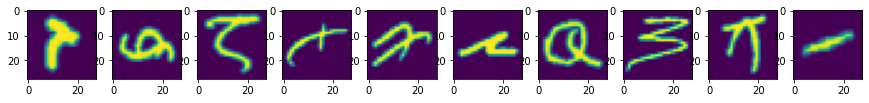

After shift:


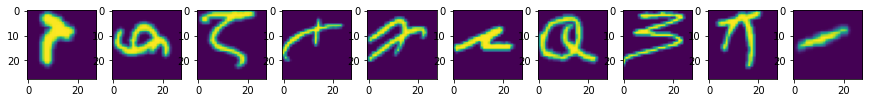

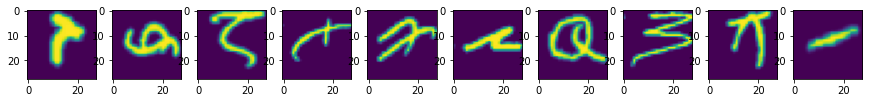

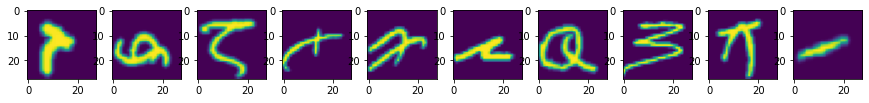

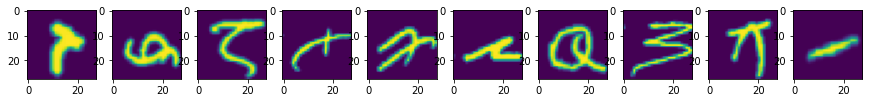

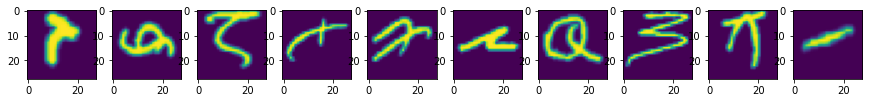

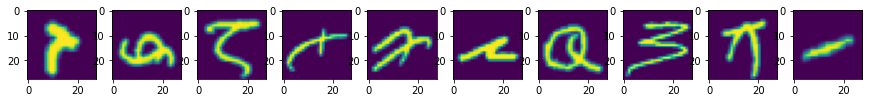

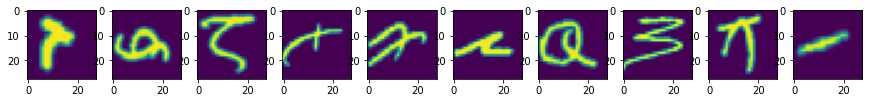

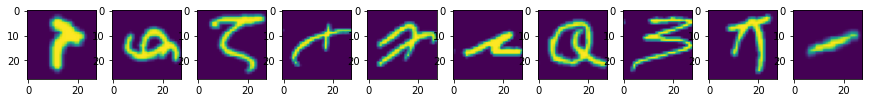

In [ ]:
from numpy import zeros

print("Before shift:")
plt.figure(figsize=(15, 15))
for index in range(10):
    image = train_data[index].reshape(28,28)
    plt.subplot(10, 10, index+1)
    plt.imshow(image)
plt.show()

print("After shift:")
plt.figure(figsize=(15, 15))
for index in range(10):
    image = train_data_aug1[index].reshape(28,28)
    plt.subplot(10, 10, index+1)
    plt.imshow(image)
plt.show()
plt.figure(figsize=(15, 15))
for index in range(10):
    image = train_data_aug2[index].reshape(28,28)
    plt.subplot(10, 10, index+1)
    plt.imshow(image)
plt.show()
plt.figure(figsize=(15, 15))
for index in range(10):
    image = train_data_aug3[index].reshape(28,28)
    plt.subplot(10, 10, index+1)
    plt.imshow(image)
plt.show()
plt.figure(figsize=(15, 15))
for index in range(10):
    image = train_data_aug4[index].reshape(28,28)
    plt.subplot(10, 10, index+1)
    plt.imshow(image)
plt.show()
plt.figure(figsize=(15, 15))
for index in range(10):
    image = train_data_aug5[index].reshape(28,28)
    plt.subplot(10, 10, index+1)
    plt.imshow(image)
plt.show()
plt.figure(figsize=(15, 15))
for index in range(10):
    image = train_data_aug6[index].reshape(28,28)
    plt.subplot(10, 10, index+1)
    plt.imshow(image)
plt.show()
plt.figure(figsize=(15, 15))
for index in range(10):
    image = train_data_aug7[index].reshape(28,28)
    plt.subplot(10, 10, index+1)
    plt.imshow(image)
plt.show()
plt.figure(figsize=(15, 15))
for index in range(10):
    image = train_data_aug8[index].reshape(28,28)
    plt.subplot(10, 10, index+1)
    plt.imshow(image)
plt.show()



In [25]:
train_image_num = train_data.shape[0]
test_image_num = test_data.shape[0]

# print("shape of train_data: {}".format(train_data.shape))
# print("shape of train_label: {}".format(train_label.shape))
# print("shape of test_data: {}".format(test_data.shape))


# print("train_image_num  is : {}".format(train_image_num))
# print("test_image_num   is : {}".format(test_image_num))

In [26]:
val_image_num=8000

## Convert the training labels to one hot vector

In [27]:
label_temp = np.zeros((train_image_num, 47), dtype = np.float32)
for i in range(train_image_num):
    label_temp[i][train_label[i]] = 1
train_label_onehot = np.copy(label_temp)
# print("One-hot training labels shape:",train_label_onehot.shape)





In [36]:
print(train_label_onehot.shape)

(100000, 47)


## Hyperparameters

In [28]:
EPOCH = 500
Batch_size = 32
Learning_rate = 0.00008


In [ ]:
from copy import deepcopy
from model.network import Network ,optimizer
from model import layer 
#opti = optimizer('SGD', 0.01)
#opti = optimizer('momentum', 0.01, {'beta' : 0.9})
#opti = optimizer('adagrad', 0.01, {'epsilon' : 1e-8})
opt = optimizer('adam', Learning_rate, {'epsilon':1e-8, 'beta1':0.9, 'beta2':0.999})
train_batch_num = (train_image_num  -  val_image_num  )//Batch_size
val_batch_num = (val_image_num)//Batch_size
# test_batch_num = test_image_num//Batch_size
layers = [
layer.FullyConnected(28*28, 512),
layer.relu() ,
layer.FullyConnected(512, 256),
layer.relu() ,
layer.FullyConnected(256, 128),
layer.relu() ,
layer.FullyConnected(128, 64),
layer.relu() ,
layer.FullyConnected(64, 47),
layer.SoftmaxWithloss()
]
net = Network(layers,Learning_rate,opt)
train_data_temp=np.zeros((100000, 784), dtype=int)
train_losss=[]
train_accs=[]
val_losss=[]
val_accs=[]
good = 0
for epoch in range(1, EPOCH+1):
    train_hit = 0
    val_hit = 0
    total_train_loss = 0
    total_val_loss = 0
    for it in range(train_batch_num):
        a= random.randint(1,9)
        # a=1

        if a==1:
            pred, train_loss = net.forward(train_data[it*Batch_size:(it+1)*Batch_size], train_label_onehot[it*Batch_size:(it+1)*Batch_size])
        elif a==2:
            pred, train_loss = net.forward(train_data_aug1[it*Batch_size:(it+1)*Batch_size], train_label_onehot[it*Batch_size:(it+1)*Batch_size])
        elif a==3:
            pred, train_loss = net.forward(train_data_aug2[it*Batch_size:(it+1)*Batch_size], train_label_onehot[it*Batch_size:(it+1)*Batch_size])
        elif a==4: 
            pred, train_loss = net.forward(train_data_aug3[it*Batch_size:(it+1)*Batch_size], train_label_onehot[it*Batch_size:(it+1)*Batch_size])
        elif a==5: 
            pred, train_loss = net.forward(train_data_aug4[it*Batch_size:(it+1)*Batch_size], train_label_onehot[it*Batch_size:(it+1)*Batch_size])
        elif a==6: 
            pred, train_loss = net.forward(train_data_aug5[it*Batch_size:(it+1)*Batch_size], train_label_onehot[it*Batch_size:(it+1)*Batch_size])
        elif a==7: 
            pred, train_loss = net.forward(train_data_aug6[it*Batch_size:(it+1)*Batch_size], train_label_onehot[it*Batch_size:(it+1)*Batch_size])
        elif a==8: 
            pred, train_loss = net.forward(train_data_aug7[it*Batch_size:(it+1)*Batch_size], train_label_onehot[it*Batch_size:(it+1)*Batch_size])
        else : 
            pred, train_loss = net.forward(train_data_aug8[it*Batch_size:(it+1)*Batch_size], train_label_onehot[it*Batch_size:(it+1)*Batch_size])

        pred_index = np.argmax(pred, axis=1)
        train_hit += (pred_index==train_label[it*Batch_size:(it+1)*Batch_size]).sum()
        total_train_loss += train_loss

        net.backward(train_label_onehot[it*Batch_size:(it+1)*Batch_size])
        # net.update(train_data[it*Batch_size:(it+1)*Batch_size], Learning_rate)
        
    for titt in range(val_batch_num):
        tit=train_batch_num+titt

        pred, val_loss = net.forward(train_data[tit*Batch_size:(tit+1)*Batch_size], train_label_onehot[tit*Batch_size:(tit+1)*Batch_size])

        pred_index = np.argmax(pred, axis=1)
        val_hit += (pred_index==train_label[tit*Batch_size:(tit+1)*Batch_size]).sum()
        total_val_loss += val_loss
    

    train_loss=np.array(total_train_loss/train_batch_num)
    train_acc=np.array(train_hit/(train_image_num-val_image_num)*100.0)
    val_loss=np.array(total_val_loss/val_batch_num)
    val_acc=np.array(val_hit/val_image_num*100.0)
    train_losss.append(train_loss)
    train_accs.append(train_acc)
    val_losss.append(val_loss)
    val_accs.append(val_acc)
    if good < val_acc:
        best_net = deepcopy(net)
        good = val_acc
        print('good!')
    print('Epoch:%3d'%epoch, '|Train Loss:%8.4f'%(train_loss), '|Train Acc:%3.4f'%(train_acc)
          , '|Val Loss:%8.4f'%(val_loss), '|Val Acc:%3.4f'%(val_acc))

KeyboardInterrupt: 

## Dump for evaluation (upload your DLAD-test-predict.csv to kaggle )

Optimizer: adam
layers: [<model.layer.FullyConnected object at 0x000002724BEA2D00>, <model.layer.relu object at 0x000002724B70AA90>, <model.layer.FullyConnected object at 0x000002724C5D3AC0>, <model.layer.relu object at 0x000002722F32AB80>, <model.layer.FullyConnected object at 0x000002724C065B50>, <model.layer.relu object at 0x000002724C065DC0>, <model.layer.FullyConnected object at 0x000002724C5CBE50>, <model.layer.relu object at 0x000002724B713640>, <model.layer.FullyConnected object at 0x000002724C1F3940>, <model.layer.SoftmaxWithloss object at 0x000002724BEA2850>]
Batch size: 32
Learning rate: 0.0001


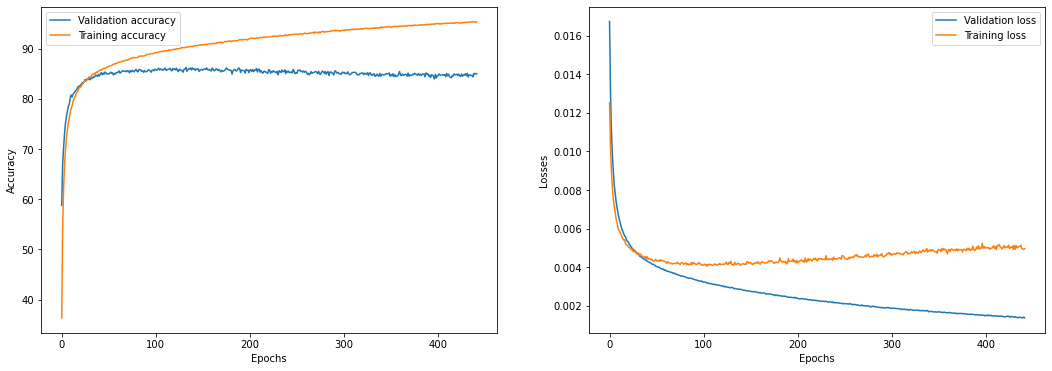

In [ ]:
print("Optimizer:",opt.name)
print("layers:",layers)
print("Batch size:",Batch_size )
print("Learning rate:",Learning_rate)
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(val_accs,label="Validation accuracy")
plt.plot(train_accs,label="Training accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.plot(train_losss,label="Validation loss")
plt.plot(val_losss,label="Training loss")
plt.legend()
plt.show()

In [ ]:
test_pred_list = []

for tit in range(test_image_num//Batch_size):
    pred, test_loss = best_net.forward(test_data[tit*Batch_size:(tit+1)*Batch_size], train_label_onehot[tit*Batch_size:(tit+1)*Batch_size])
    pred_index = np.argmax(pred, axis=1)
    test_pred_list += pred_index.tolist()
    

print('Dump file...')
df = pd.DataFrame(test_pred_list, columns=["Category"])
df.to_csv('DLAD-test-predict.csv', index=True, index_label="Id")

Dump file...
